# 问题

二维正方形平板中，板的初始温度为0，时间$t >= 0$时，$x=0$处的边界受高温，温度为1，其他边界条件不变。域的长度为100，确定$t=400$时，板内的温度分布，并比较LBM与FDM方法的结果。其中，热扩散系数为0.25，格子大小$xl=yl=1.0$。

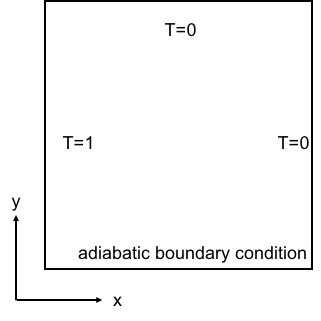

# A.1.3 The LBM Code (D2Q4)

In [5]:
# LBM Code for 2-D, diffusion problem, D2Q4

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline


n = 100
m = 100
f1 = np.zeros((n+1,m+1),dtype=float)
f2 = np.zeros((n+1,m+1),dtype=float)
f3 = np.zeros((n+1,m+1),dtype=float)
f4 = np.zeros((n+1,m+1),dtype=float)

rho = np.zeros((n+1,m+1),dtype=float)
x = np.zeros(n+1,dtype=float)
y = np.zeros(m+1,dtype=float)

dx = 1.0
dy = 1.0
dt = 1.0
x[0] = 0.0
y[0] = 0.0

for i in range(1,n+1):
    x[i] = x[i-1] + dx
    
for i in range(1,m+1):
    y[i] = y[i-1] + dy
    
csq = dx*dx/(dt*dt)   # problem
alpha = 0.25
omega = 1.0/(2.*alpha/(dt*csq) + 0.5)
mstep = 400

# initial values of the dependent variable
for j in range(0,m+1):
    for i in range(0,n+1):
        rho[i,j] = 0.0
        
for j in range(0,m+1):
    for i in range(0,n+1):
        f1[i,j] = 0.25*rho[i,j]
        f2[i,j] = 0.25*rho[i,j]
        f3[i,j] = 0.25*rho[i,j]
        f4[i,j] = 0.25*rho[i,j]
        
# main loop
for k in range(1,mstep+1):
    # collision process:
    for j in range(0,m+1):
        for i in range(0,n+1):
            feq = 0.25*rho[i,j]
            f1[i,j] = omega*feq + (1.-omega)*f1[i,j]
            f2[i,j] = omega*feq + (1.-omega)*f2[i,j]
            f3[i,j] = omega*feq + (1.-omega)*f3[i,j]
            f4[i,j] = omega*feq + (1.-omega)*f4[i,j]
            
    # streaming process
    for j in range(0,m+1):
        for i in range(1,n+1):
            f1[n-i,j] = f1[n-i-1,j]
            f2[i-1,j] = f2[i,j]
            
    for i in range(0,n+1):
        for j in range(1,m+1):
            f3[i,m-j] = f3[i,m-j-1]
            f4[i,j-1] = f4[i,j]
            
    # boundary condition
    for j in range(1,m+1):
        f1[0,j] = 0.5 - f2[0,j]
        f3[0,j] = 0.5 - f4[0,j]
        f1[n,j] = f1[n-1,j]
        f2[n,j] = f2[n-1,j]
        f3[n,j] = f3[n-1,j]
        f4[n,j] = f4[n-1,j]
        
    for i in range(1,n+1):
        f1[i,m] = 0.0
        f2[i,m] = 0.0
        f3[i,m] = 0.0
        f4[i,m] = 0.0
        f1[i,0] = f1[i,1]
        f2[i,0] = f2[i,1]
        f3[i,0] = f3[i,1]
        f4[i,0] = f4[i,1]
        
    for j in range(0,m+1):
        for i in range(0,n+1):
            rho[i,j] = f1[i,j] + f2[i,j] + f3[i,j] +f4[i,j]            
# end of the main loop

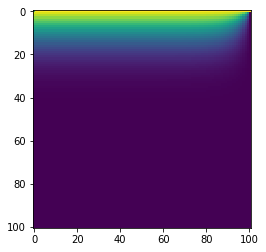

In [7]:
# plot 2D temperature distribution
plt.imshow(rho, interpolation='nearest')
plt.show()

# A.1.4 The FDM Code (2-D)

In [12]:
# FDM Code for 2-D diffusion problem

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

# initial condition
m = 100
n = 100
f0 = np.zeros((n+1,m+1),dtype=float)
f = np.zeros((n+1,m+1),dtype=float)
x = np.zeros((n+1,m+1),dtype=float)
y = np.zeros((n+1,m+1),dtype=float)
tmp = np.ones(n,dtype=float)
dx = 1.0
dt = 0.2
dy = 1.0
time = 0.0
u = 0.1
v = 0.1
alpha = 1.0
mstep = 400   # the total number of time steps

for j in range(0,m+1):
    f0[0,j] = 1.0
    f[0,j] = 1.0
    
for i in range(0,n+1):
    f0[i,m] = 0.0
    f[i,m] = 0.0
       
# main loop
for kk in range(1,mstep+1):
    for j in range(1,m):
        for i in range(1,n):
            termx = (f0[i+1,j] + f0[i-1,j]) / (dx*dx)
            termy = (f0[i,j+1] + f0[i,j-1]) / (dy*dy)
            dd = 1.0 / (dx*dx) + 1.0 / (dy*dy)
            advx = u*(f0[i,j] - f0[i-1,j]) / dx
            advy = v*(f0[i,j] - f0[i,j-1]) / dy
            advt = dt*(advx +  advy)
            f[i,j] = f0[i,j] + dt*alpha*(termx + termy - 2.0*f0[i,j]*dd) - advt
            
    # boundary condition
    for j in range(1,m):
        for i in range(1,n):
            f0[i,j] = f[i,j]
            
    # adiabatic bottom boundary
    for i in range(0,n+1):
        f0[i,0] = f0[i,1]
        f[i,0] = f[i,1]
        
    # adiabatic right boundary
    for j in range(0,m+1):
        f0[n,j] = 0
        f[n,j] = 0

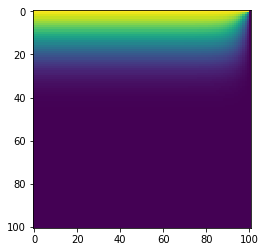

In [15]:
# plot 2D temperature distribution
plt.imshow(f, interpolation='nearest')
plt.show()

# A.1.5 The LBM Code (D2Q9)

In [27]:
# LBM Code for 2-D diffusion problem,D2Q9

import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

m = 100
n = 100
f = np.zeros((9,n+1,m+1), dtype=float)
rho = np.zeros((n+1,m+1), dtype=float)
x = np.zeros((n+1,m+1), dtype=float)
y = np.zeros((n+1,m+1), dtype=float)
w = np.zeros((9,1), dtype=float)

dx = 1.0
dy = 1.0
for i in range(i,n+1):
    x[i] = x[i-1] + dx
    
for j in range(1,m+1):
    y[j] = y[j-1]+ dy
    
dt = 1.0
tw = 1.0
alpha = 0.25
csq = (dx*dx)/(dt*dt)    # 中间变量
omega = 1.0/(3.0*alpha/(csq*dt) + 0.5)    # 松弛因子与扩散系数的关系
mstep = 400

w[0] = 4.0/9
for i in range(1,5):
    w[i] = 1.0/9
for i in range(5,9):
    w[i] = 1.0/36
    
for j in range(0,m+1):
    for i in range(0,n+1):
        for k in range(0,9):
            f[k,i,j] = w[k]*rho[i,j]
            if (i == 0):
                f[k,i,j] = w[k]*tw
                
# main loop
for kk in range(1,mstep+1):
    for j in range(0,m+1):
        for i in range(0,n+1):
            sum = 0.0
            for k in range(0,9):
                sum = sum + f[k,i,j]
            rho[i,j] = sum
            
    for j in range(0,m+1):
        for i in range(0,n+1):
            for k in range(0,9):
                feq = w[k]*rho[i,j]
                f[k,i,j] = omega*feq + (1.0-omega)*f[k,i,j]
      
    # streaming
    for j in range(m,0,-1):
        for i in range(0,n):
            f[2,i,j] = f[2,i,j-1]
            f[6,i,j] = f[6,i+1,j-1]
            
    for j in range(m,0,-1):
        for i in range(n,0,-1):
            f[1,i,j] = f[1,i-1,j]
            f[5,i,j] = f[5,i-1,j-1]
            
    for j in range(0,m):
        for i in range(n,0,-1):
            f[4,i,j] = f[4,i,j+1]
            f[8,i,j] = f[8,i-1,j+1]
            
    for j in range(0,m):
        for i in range(0,n):
            f[3,i,j] = f[3,i+1,j]
            f[7,i,j] = f[7,i+1,j+1]
            
    # boundary condition
    for j in range(0,m+1):
        f[1,0,j] = w[1]*tw + w[3]*tw - f[3,0,j]
        f[5,0,j] = w[5]*tw + w[7]*tw - f[7,0,j]
        f[8,0,j] = w[8]*tw + w[6]*tw - f[6,0,j]
        f[3,n,j] = -f[1,n,j]
        f[6,n,j] = -f[8,n,j]
        f[7,n,j] = -f[5,n,j]
        
    for i in range(0,n+1):
        f[4,n,j] = -f[2,n,j]
        f[7,n,j] = -f[5,n,j]
        f[8,n,j] = -f[6,n,j]
        f[1,i,0] = f[1,i,1]
        f[2,i,0] = f[2,i,1]
        f[3,i,0] = f[3,i,1]
        f[4,i,0] = f[4,i,1]
        f[5,i,0] = f[5,i,1]
        f[6,i,0] = f[6,i,1]
        f[7,i,0] = f[7,i,1]
        f[8,i,0] = f[8,i,1]
        
    for j in range(0,m+1):
        for i in range(0,n+1):
            sum = 0.0
            for k in range(0,9):
                sum = sum + f[k,i,j]
            rho[i,j] = sum

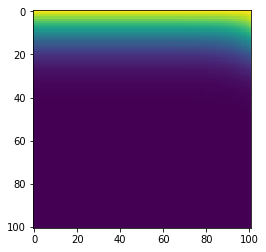

In [29]:
# plot 2D temperature distribution
plt.imshow(rho, interpolation='nearest')
plt.show()